<h1>Activity 2 - UK ROAD ACCIDENT DATA ANALYTICS PROJECT</h1>
<hr>
<h1>Analyst : Joshua Z. Deñado</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('datasets\\uk_road_accident.csv')
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h2>Checking Null Values</h2>

In [5]:
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Cleaning the Data Frame</h2>

In [6]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
df['Road_Surface_Conditions'].mode()

0    Dry
Name: Road_Surface_Conditions, dtype: object

In [9]:
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [10]:
df['Road_Type'].mode()

0    Single carriageway
Name: Road_Type, dtype: object

In [11]:
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [12]:
df['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: object

In [13]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [14]:
df['Weather_Conditions'].mode()

0    Fine no high winds
Name: Weather_Conditions, dtype: object

In [15]:
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Checking the Data Types</h2>

In [16]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [17]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('object')
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h2>Changing the Data Types</h2>

In [18]:
# df['Index'] = df['Index'].astype('category')
# df['Accident_Severity'] = df['Accident_Severity'].astype('category')
# df['Accident Date'] = df['Accident Date'].astype('category')
# df['Light_Conditions'] = df['Light_Conditions'].astype('category')
# df['District Area'] = df['District Area'].astype('category')
# df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype('category')
# df['Road_Type'] = df['Road_Type'].astype('category')
# df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('category')
# df['Weather_Conditions'] = df['Weather_Conditions'].astype('category')
# df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')
# df.dtypes

<h1 style="color:red;">Explanatory Data Analytics (EDA)</h1>

<h2>1. Which type of vehicle is involved in the highest number of accidents?</h2>

In [19]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [20]:
vehicle = df['Vehicle_Type'].value_counts()
print(f'{vehicle},\n\nTotal : {vehicle.sum()}')

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64,

Total : 660679


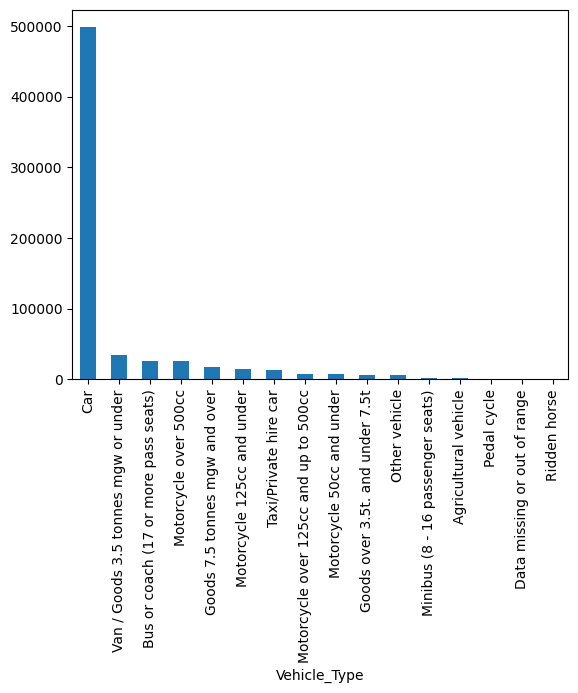

In [21]:
vehicle = df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

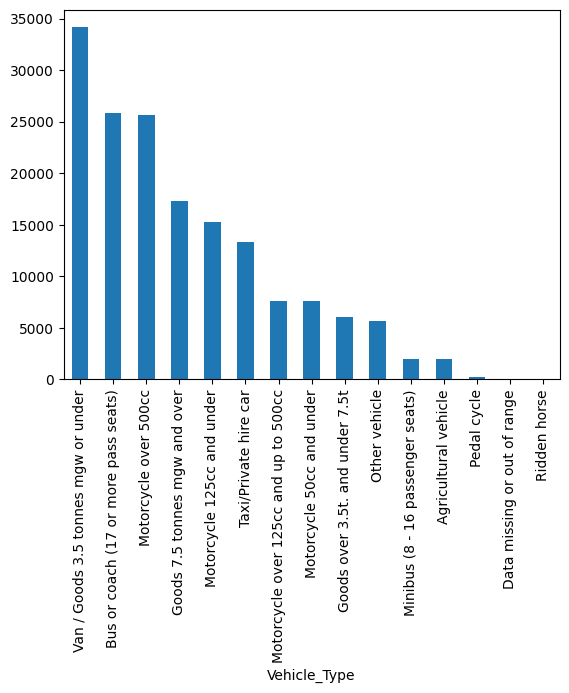

In [22]:
nocar_df = df[df['Vehicle_Type'] != 'Car']
nocar_df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

INSIGHTS 1 : Cars are the most frequently involved vehicles, with 497,992 recorded accidents.Cars are the most frequently involved in road accidents, with a total of 497,992 cases recorded. This highlights how cars, being the most common mode of transport, are more exposed to road risks than other vehicles.

<h2>2. Under what weather conditions do accidents occur most frequently?</h2>

In [23]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [24]:
df['Weather_Conditions'].unique()

array(['Fine no high winds', 'Raining no high winds', 'Other',
       'Fine + high winds', 'Raining + high winds',
       'Snowing no high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

In [25]:
weather = df['Weather_Conditions'].value_counts()
print(f'{weather},\n\nTotal : {weather.sum()}')

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64,

Total : 660679


<Axes: xlabel='Weather_Conditions'>

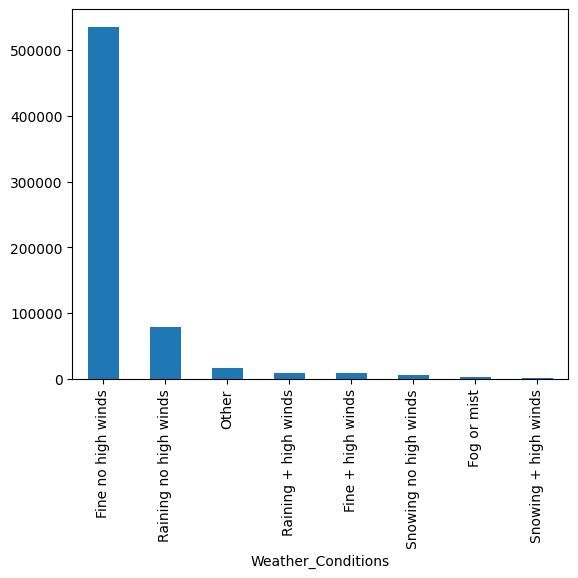

In [26]:
weather = df['Weather_Conditions'].value_counts().plot(kind='bar')
weather

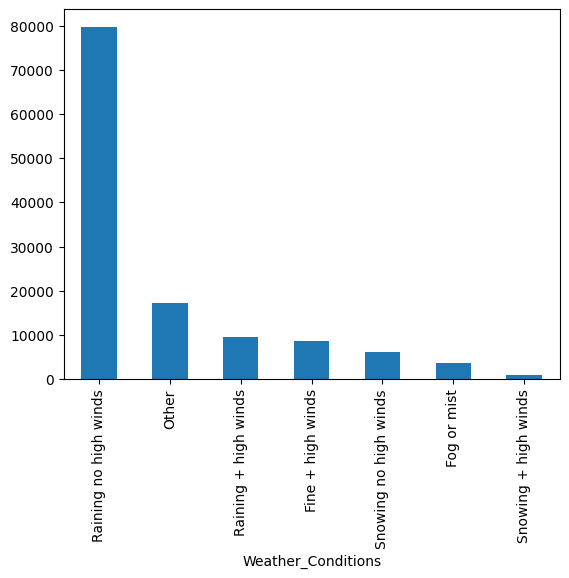

In [27]:
nofineweather_df = df[df['Weather_Conditions'] != 'Fine no high winds']
nofineweather_df['Weather_Conditions'].value_counts().plot(kind='bar')
plt.show()

INSIGHTS 2 : The majority of accidents happen during fine weather with no strong winds (535,013 accidents). This indicates that most accidents are not caused by adverse weather, but by other factors such as driver behavior.

<h2>3. Are accidents more common in urban areas or rural areas?</h2>

In [28]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [29]:
df['Urban_or_Rural_Area'].unique()

array(['Urban', 'Rural', 'Unallocated'], dtype=object)

In [30]:
accidents = df['Urban_or_Rural_Area'].value_counts()
accidents

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<Axes: xlabel='Urban_or_Rural_Area'>

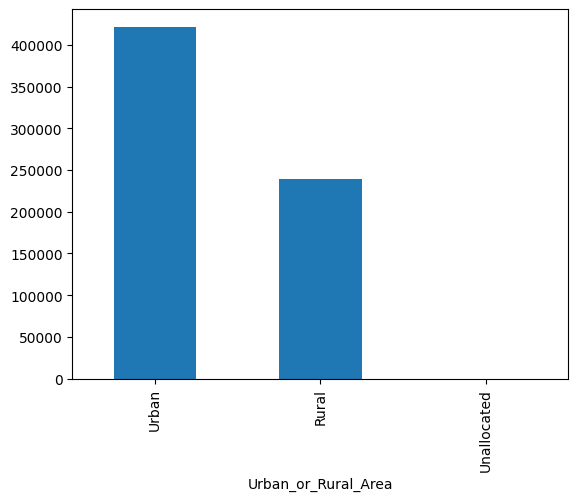

In [31]:
accidents = df['Urban_or_Rural_Area'].value_counts().plot(kind='bar')
accidents

INSIGHTS 3 : Urban areas record 421,678 accidents, which is higher than rural locations. The higher traffic density and more complicated road systems in cities likely contribute to this trend.

<h2>4. On which type of road do accidents most often occur?</h2>

In [32]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [33]:
df['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road'], dtype=object)

In [34]:
road_type = df['Road_Type'].value_counts()
road_type

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<Axes: xlabel='Road_Type'>

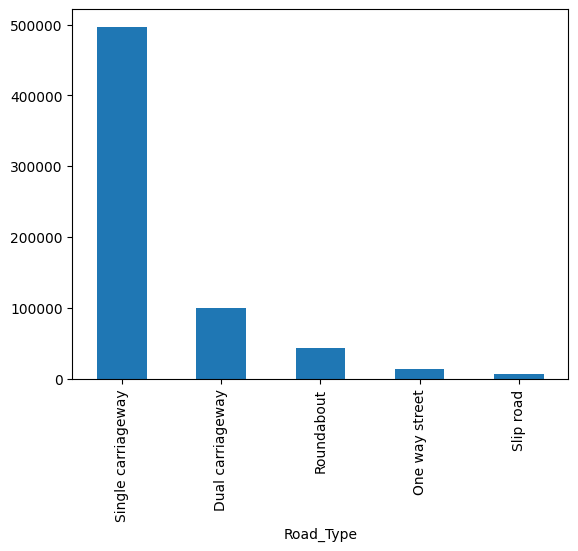

In [35]:
road_type = df['Road_Type'].value_counts().plot(kind='bar')
road_type

INSIGHTS 4 : Single carriageways record the highest number of accidents, with 496,663 cases. This could be linked to their heavy use and limited separation of traffic directions.

<h2>5. Under what road surface conditions do most accidents occur?</h2>

In [36]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [37]:
df['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
       'Flood over 3cm. deep'], dtype=object)

In [38]:
road_surface = df['Road_Surface_Conditions'].value_counts()
road_surface

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<Axes: xlabel='Road_Surface_Conditions'>

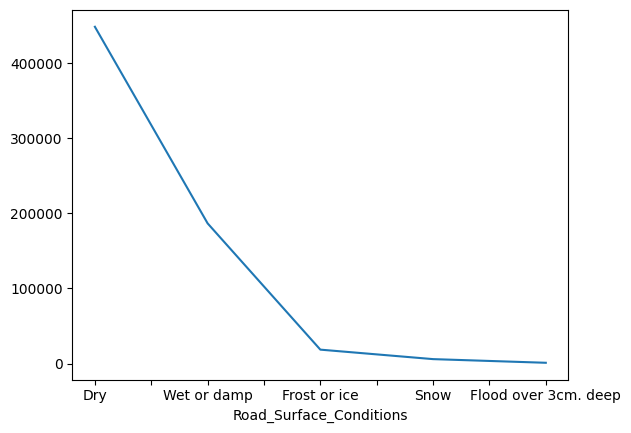

In [39]:
road_surface = df['Road_Surface_Conditions'].value_counts().plot(kind='line')
road_surface

INSIGHTS 5 : Most accidents happen on dry roads (448,547 accidents). This shows that hazardous conditions like rain or ice are not the main contributors to accident frequency.

<h2>6. Which type of vehicle records the fewest serious accidents?</h2>

In [40]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [41]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [42]:
serious_road_accidents = df[df['Accident_Severity'] == 'Serious']

types_vehicle = serious_road_accidents.groupby(['Vehicle_Type']).size()
types_vehicle

Vehicle_Type
Agricultural vehicle                       282
Bus or coach (17 or more pass seats)      3373
Car                                      66461
Goods 7.5 tonnes mgw and over             2321
Goods over 3.5t. and under 7.5t            857
Minibus (8 - 16 passenger seats)           276
Motorcycle 125cc and under                2031
Motorcycle 50cc and under                 1014
Motorcycle over 125cc and up to 500cc     1014
Motorcycle over 500cc                     3457
Other vehicle                              767
Pedal cycle                                 39
Taxi/Private hire car                     1771
Van / Goods 3.5 tonnes mgw or under       4554
dtype: int64

<Axes: xlabel='Vehicle_Type'>

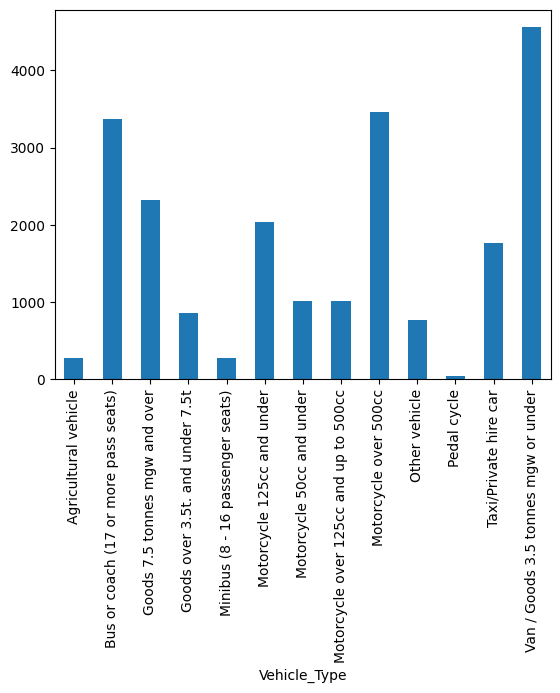

In [43]:
# Filter: serious accidents and non-car vehicles
serious_nocar = df[(df['Accident_Severity'] == 'Serious') & (df['Vehicle_Type'] != 'Car')]

# Group by Vehicle_Type and plot
types_vehicle = serious_nocar.groupby('Vehicle_Type').size().plot(kind='bar')
types_vehicle

INSIGHTS 6 : Pedal cycles have the lowest number of serious accidents, with only 39 cases reported. This may be due to fewer cyclists compared to motorists, reducing their overall involvement.

<h2>7. What lighting conditions are linked to the fewest serious accidents?</h2>

In [44]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [45]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [46]:
serious_road_accidents = df[df['Accident_Severity'] == 'Serious']

light_conditions = serious_road_accidents.groupby(['Light_Conditions']).size()
light_conditions

Light_Conditions
Darkness - lighting unknown      794
Darkness - lights lit          19130
Darkness - lights unlit          360
Darkness - no lighting          7174
Daylight                       60759
dtype: int64

<Axes: xlabel='Light_Conditions'>

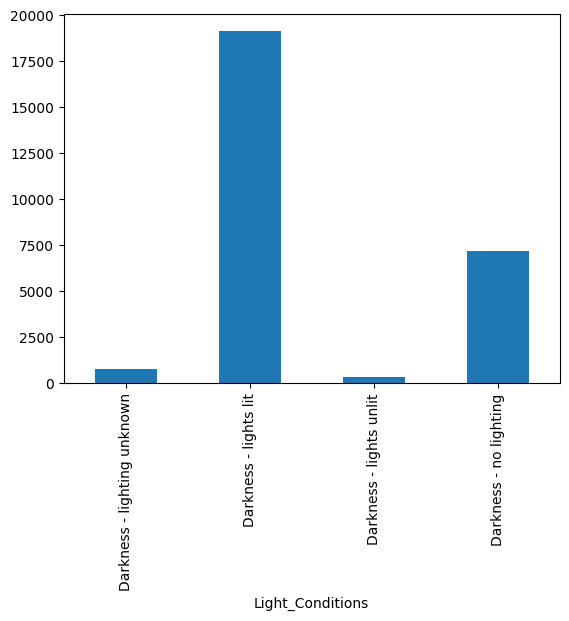

In [47]:
# filters accident severity to serious and light conditions to daylight
serious_road_accidents = df[(df['Accident_Severity'] == 'Serious') & (df['Light_Conditions'] != 'Daylight')]

light_conditions = serious_road_accidents.groupby(['Light_Conditions']).size().plot(kind='bar')
light_conditions

INSIGHTS 7 : Roads without street lighting at night recorded the fewest serious accidents, with only 360 cases.

<h2>8. In which district do the highest number of accidents take place?</h2>

In [48]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [49]:
district_area = df['District Area'].value_counts()
district_area

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [50]:
district_area = df['District Area'].value_counts()
district_area

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

INSIGHTS 8 : Birmingham has the highest number of recorded accidents among all districts, with 13,491 cases. This reflects the city’s large population and heavy traffic levels.

<h2>9. How many serious accidents occur in the Birmingham district?</h2>

In [51]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [52]:
serious_road_accidents = df[df['District Area'] == 'Birmingham']

severity = serious_road_accidents.groupby(['Accident_Severity']).size()
severity

Accident_Severity
Fatal        105
Serious     1474
Slight     11912
dtype: int64

<Axes: xlabel='Accident_Severity'>

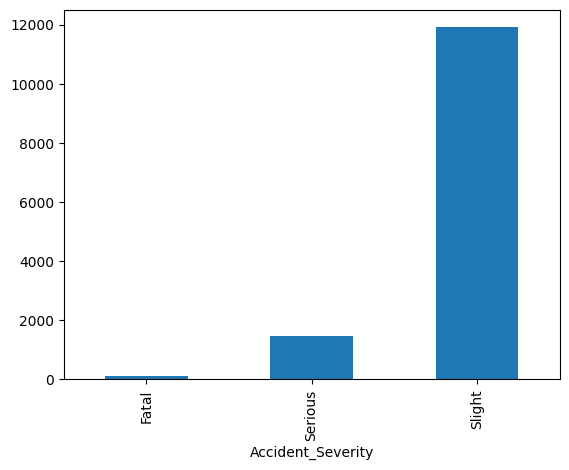

In [53]:
serious_road_accidents = df[df['District Area'] == 'Birmingham']

severity = serious_road_accidents.groupby(['Accident_Severity']).size().plot(kind='bar')
severity

<Axes: xlabel='Accident_Severity'>

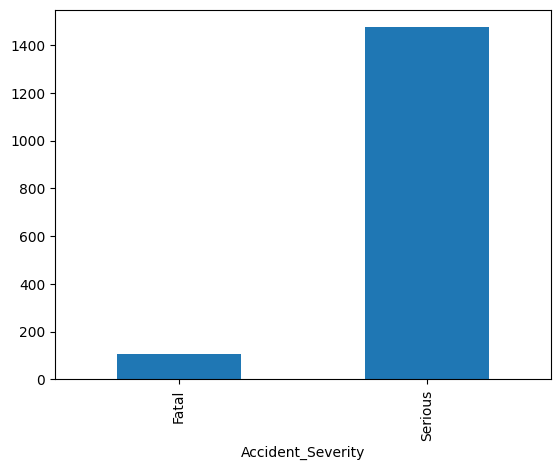

In [54]:
serious_road_accidents = df[(df['District Area'] == 'Birmingham') & (df['Accident_Severity'] != 'Slight')]
    
severity = serious_road_accidents.groupby(['Accident_Severity']).size().plot(kind='bar')
severity

INSIGHTS 9 : In Birmingham, there are 1,474 serious accidents on record. This indicates a significant level of road risk despite safety measures in the city.

<h2>10. Which type of vehicle is least often involved in accidents in Birmingham??</h2>

In [55]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [56]:
road_district = df[df['District Area'] == 'Birmingham']

vehicle_type = road_district.groupby(['Vehicle_Type']).size()
vehicle_type

Vehicle_Type
Agricultural vehicle                       61
Bus or coach (17 or more pass seats)      570
Car                                      9600
Goods 7.5 tonnes mgw and over             463
Goods over 3.5t. and under 7.5t           132
Minibus (8 - 16 passenger seats)           43
Motorcycle 125cc and under                362
Motorcycle 50cc and under                 134
Motorcycle over 125cc and up to 500cc     133
Motorcycle over 500cc                     578
Other vehicle                             113
Pedal cycle                                13
Taxi/Private hire car                     504
Van / Goods 3.5 tonnes mgw or under       785
dtype: int64

<Axes: xlabel='Vehicle_Type'>

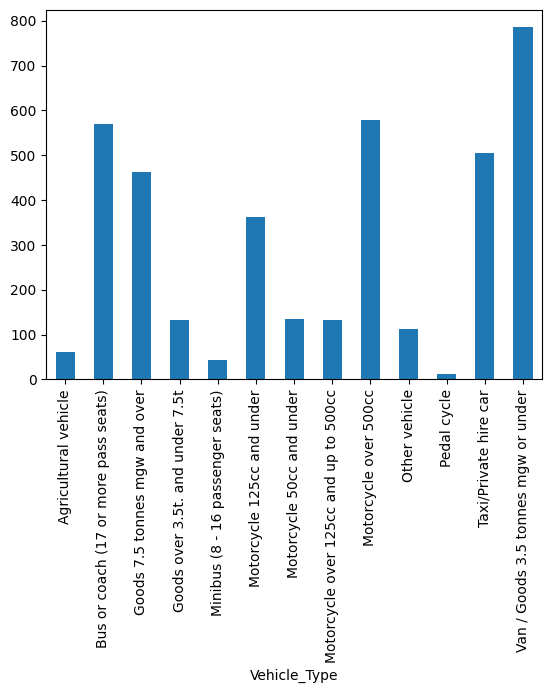

In [57]:
road_district = df[(df['District Area'] == 'Birmingham') & (df['Vehicle_Type'] != 'Car')]

vehicle_type = road_district.groupby(['Vehicle_Type']).size().plot(kind='bar')
vehicle_type

INSIGHTS 10 : Pedal cycles are the least involved, with just 13 accidents. This may be due to fewer cyclists compared to cars and other vehicles.

<h2>11. What road surface conditions are most often linked to accidents in Birmingham?</h2>

In [58]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [59]:
road_district = df[df['District Area'] == 'Birmingham']

road_condition = road_district.groupby(['Road_Surface_Conditions']).size()
road_condition

Road_Surface_Conditions
Dry                     9367
Flood over 3cm. deep       8
Frost or ice             306
Snow                     109
Wet or damp             3701
dtype: int64

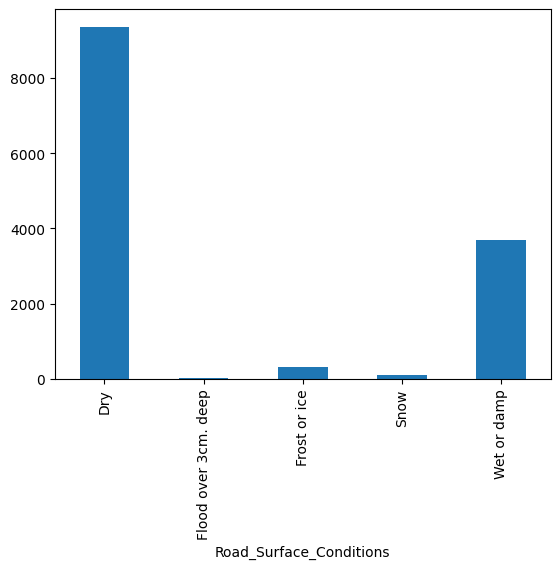

In [60]:
road_district = df[df['District Area'] == 'Birmingham']

road_condition = road_district.groupby(['Road_Surface_Conditions']).size().plot(kind='bar')

INSIGHT 11 : In Birmingham, most accidents (9,367) occur on dry roads. This shows that road surface conditions are not the main factor in accident occurrence.

<h2>12. Under which weather conditions do most accidents occur in Birmingham?</h2>

In [61]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [62]:
road_district = df[df['District Area'] == 'Birmingham']

weather_condition = road_district.groupby(['Weather_Conditions']).size()
weather_condition

Weather_Conditions
Fine + high winds          125
Fine no high winds       10638
Fog or mist                 37
Other                      713
Raining + high winds       126
Raining no high winds     1717
Snowing + high winds         8
Snowing no high winds      127
dtype: int64

<Axes: >

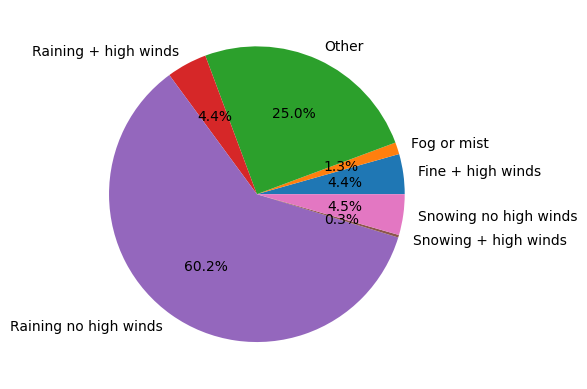

In [63]:
road_district = df[(df['District Area'] == 'Birmingham') & (df['Weather_Conditions'] != 'Fine no high winds')]

weather_condition = road_district.groupby(['Weather_Conditions']).size().plot(kind='pie', autopct='%1.1f%%')
weather_condition

INSIGHTS 12 : Fine weather accounts for 10,638 accidents in Birmingham, suggesting that normal driving conditions still pose significant risks. It reinforces that many crashes are linked to driver actions rather than weather.

<h2>13. How many fatal accidents are recorded in the Clackmannanshire district?</h2>

In [64]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [65]:
road_district = df[df['District Area'] == 'Clackmannanshire']

accident_severity = road_district.groupby(['Accident_Severity']).size()
accident_severity

Accident_Severity
Fatal       1
Serious    18
Slight     72
dtype: int64

<Axes: >

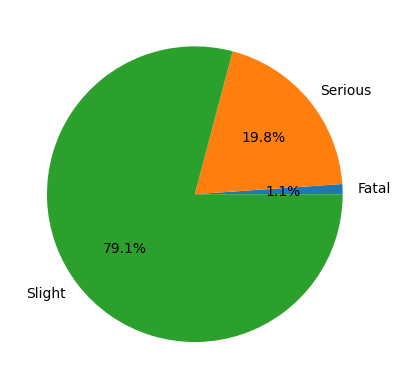

In [66]:
road_district = df[df['District Area'] == 'Clackmannanshire']

accident_severity = road_district.groupby(['Accident_Severity']).size().plot(kind='pie', autopct='%1.1f%%')
accident_severity

INSIGHTS 13 : Clackmannanshire has just 1 fatal accident recorded. This shows that while accidents do happen, the risk of death in this area is very low.

<h2>14. Which road surface condition is least associated with accidents in Clackmannanshire?</h2>

In [67]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [68]:
road_district = df[df['District Area'] == 'Clackmannanshire']

road_condition = road_district.groupby(['Road_Surface_Conditions']).size()
road_condition

Road_Surface_Conditions
Dry             56
Frost or ice     4
Wet or damp     31
dtype: int64

<Axes: >

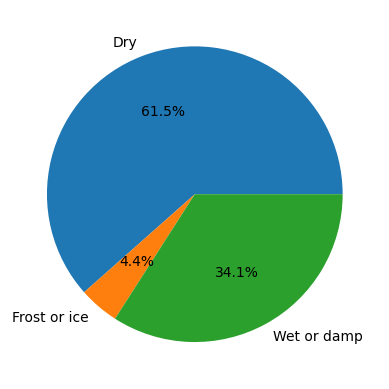

In [69]:
road_district = df[df['District Area'] == 'Clackmannanshire']

road_condition = road_district.groupby(['Road_Surface_Conditions']).size().plot(kind='pie', autopct='%1.1f%%')
road_condition

INSIGHTS 14 : Frost or icy conditions are linked to only 4 accidents. This means ice plays only a minor role compared to other accident causes.

<h2>15. Which road surface condition is associated with the very fewest accidents in Clackmannanshire?</h2>

In [70]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [71]:
road_district = df[df['District Area'] == 'Clackmannanshire']

weather_condition = road_district.groupby(['Weather_Conditions']).size()
weather_condition

Weather_Conditions
Fine + high winds         3
Fine no high winds       71
Fog or mist               1
Other                     5
Raining no high winds    11
dtype: int64

<Axes: >

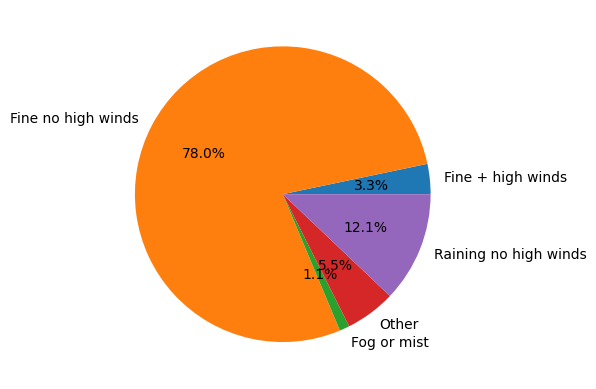

In [72]:
road_district = df[df['District Area'] == 'Clackmannanshire']

weather_condition = road_district.groupby(['Weather_Conditions']).size().plot(kind='pie', autopct='%1.1f%%')
weather_condition

INSIGHTS 15 : Fog or mist has the lowest number of accidents, with just 1 case recorded. Visibility issues alone therefore appear to be a rare cause of crashes.

<h2>16. In what type of weather do the fewest car accidents occur?</h2>

In [73]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [74]:
road_district = df[df['Vehicle_Type'] == 'Car']

weather_condition = road_district.groupby(['Weather_Conditions']).size()
weather_condition

Weather_Conditions
Fine + high winds          6463
Fine no high winds       403324
Fog or mist                2641
Other                     12993
Raining + high winds       7206
Raining no high winds     59940
Snowing + high winds        677
Snowing no high winds      4748
dtype: int64

<Axes: >

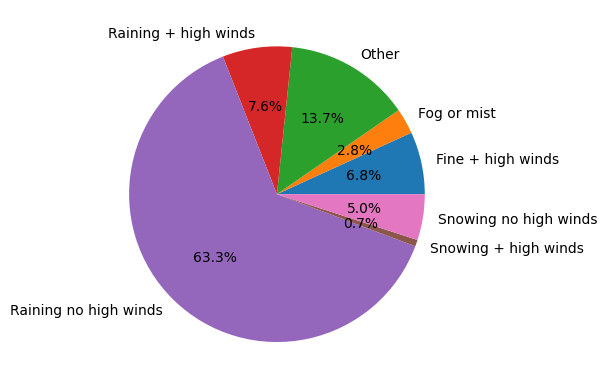

In [75]:
road_district = df[(df['Vehicle_Type'] == 'Car') & (df['Weather_Conditions'] != 'Fine no high winds')]

weather_condition = road_district.groupby(['Weather_Conditions']).size().plot(kind='pie', autopct='%1.1f%%')
weather_condition

INSIGHTS 16 : Car accidents in snow with strong winds are very rare, with only 677 cases reported. Harsh weather may discourage people from traveling, lowering the accident rate.

<h2>17. In what type of weather do fewest bus accidents occur?</h2>

In [76]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [77]:
vehicle_type = df[df['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)']

weather_condition = vehicle_type.groupby(['Weather_Conditions']).size()
weather_condition

Weather_Conditions
Fine + high winds          350
Fine no high winds       20963
Fog or mist                134
Other                      609
Raining + high winds       389
Raining no high winds     3182
Snowing + high winds        32
Snowing no high winds      219
dtype: int64

<Axes: >

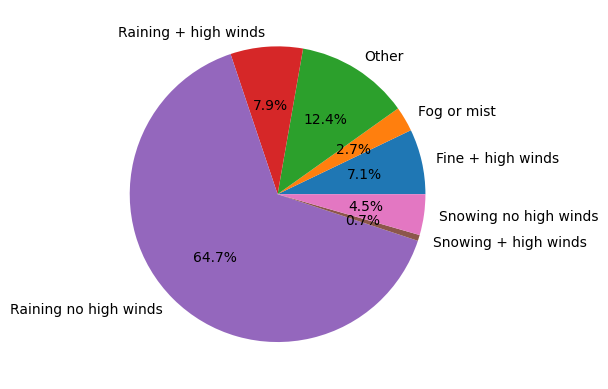

In [78]:
vehicle_type = df[(df['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)') & (df['Weather_Conditions'] != 'Fine no high winds')]

weather_condition = vehicle_type.groupby(['Weather_Conditions']).size().plot(kind='pie', autopct='%1.1f%%')
weather_condition

INSIGHTS 17 : Snow combined with high winds has resulted in just 32 accidents. This again shows that extreme weather tends to reduce driving activity.

<h2>18. How many 1 casualties are recorded in Birmingham?</h2>

In [79]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [80]:
road_district = df[df['District Area'] == 'Birmingham']

no_casualties = road_district.groupby(['Number_of_Casualties']).size()

print(no_casualties, no_casualties.sum())

Number_of_Casualties
1     10138
2      2238
3       681
4       276
5        88
6        47
7        14
8         4
9         2
10        1
15        1
18        1
dtype: int64 13491


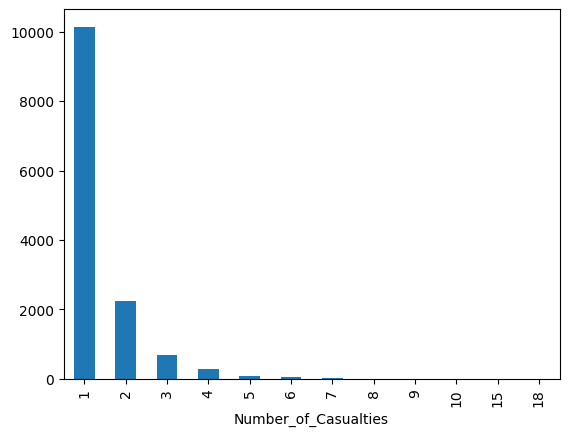

In [81]:
road_district = df[df['District Area'] == 'Birmingham']

no_casualties = road_district.groupby(['Number_of_Casualties']).size().plot(kind='bar')

INSIGHTS 18 : Birmingham records 10,138 casualties from road accidents. This underlines the serious impact of accidents on public safety in the city.

<h2>19. Birmingham records 10,138 casualties in road accidents?</h2>

In [82]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [83]:
road_district = df[df['District Area'] == 'Birmingham'] 

road_type = road_district.groupby(['Road_Type']).size()
road_type

Road_Type
Dual carriageway      3039
One way street         321
Roundabout            1008
Single carriageway    9025
Slip road               98
dtype: int64

<Axes: >

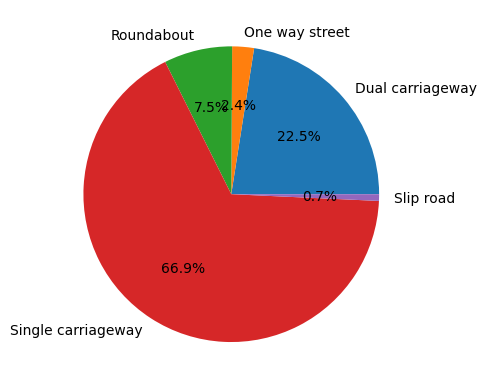

In [84]:
road_district = df[df['District Area'] == 'Birmingham'] 

road_type = road_district.groupby(['Road_Type']).size().plot(kind='pie', autopct='%1.1f%%')
road_type

INSIGHTS 19 : Single carriageways are Birmingham’s most accident-prone roads, with 9,025 incidents. Their popularity and limited safety features likely explain this high figure.

<h2>20. Which type of road accounts for the fewest accidents in Clackmannanshire?</h2>

In [85]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [86]:
road_district = df[df['District Area'] == 'Clackmannanshire']

road_type = road_district.groupby(['Road_Type']).size()
road_type

Road_Type
Dual carriageway       7
One way street         2
Roundabout            12
Single carriageway    70
dtype: int64

<Axes: >

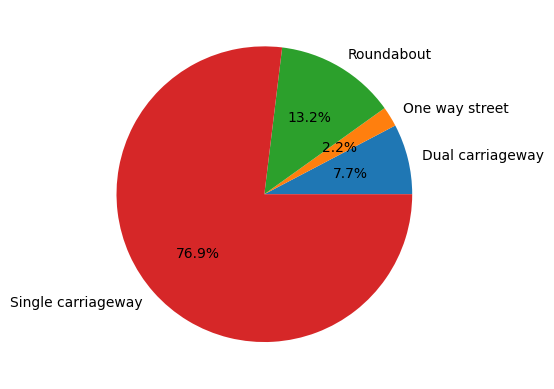

In [87]:
road_district = df[df['District Area'] == 'Clackmannanshire']

road_type = road_district.groupby(['Road_Type']).size().plot(kind='pie', autopct='%1.1f%%')
road_type

INSIGHTS 20 : One-way streets have the fewest accidents in Birmingham, with only 2 cases. Their controlled flow of traffic may make them much safer.

<h2>21. On which type of road do car accidents occur least frequently?</h2>

In [88]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [89]:
vehicle_type = df[df['Vehicle_Type'] == 'Car']

road_type = vehicle_type.groupby(['Road_Type']).size()
road_type

Road_Type
Dual carriageway       74820
One way street         10223
Roundabout             33187
Single carriageway    374464
Slip road               5298
dtype: int64

<Axes: >

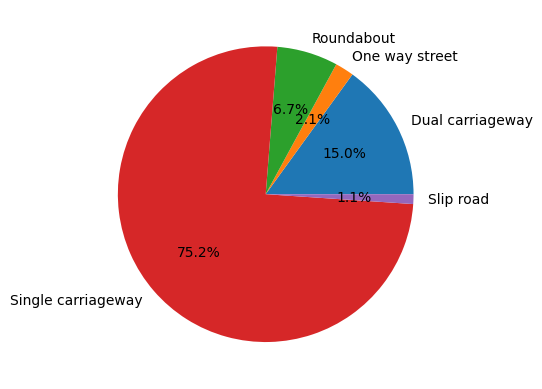

In [90]:
vehicle_type = df[df['Vehicle_Type'] == 'Car']

road_type = vehicle_type.groupby(['Road_Type']).size().plot(kind='pie', autopct='%1.1f%%')
road_type

INSIGHTS 21 : Car accidents are least frequent on slip roads, with only 5,298 cases recorded. This may be because slip roads are shorter and used mainly for entering or exiting highways, which reduces exposure to long stretches of traffic.

<h2>22. Under which road surface conditions do car accidents occur least often?</h2>

In [91]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [92]:
vehicle_type = df[df['Vehicle_Type'] == 'Car']

road_condition = vehicle_type.groupby(['Road_Surface_Conditions']).size()
road_condition

Road_Surface_Conditions
Dry                     337860
Flood over 3cm. deep       777
Frost or ice             14108
Snow                      4483
Wet or damp             140764
dtype: int64

<Axes: xlabel='Road_Surface_Conditions'>

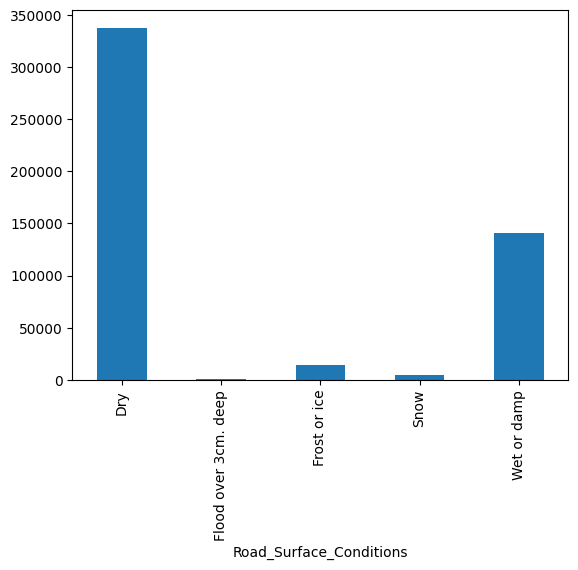

In [93]:
vehicle_type = df[df['Vehicle_Type'] == 'Car']

road_condition = vehicle_type.groupby(['Road_Surface_Conditions']).size().plot(kind='bar')
road_condition

INSIGHTS 23 : The fewest car accidents occur on flooded roads deeper than 3cm, with only 777 cases recorded. This may be because such dangerous conditions discourage drivers from traveling, leading to fewer vehicles on the road.

In [94]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [95]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')

<h1>Extracting  date information using pandas date time.</h1>

In [96]:
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day
df['DayOfWeek'] = df['Accident Date'].dt.dayofweek # Monday=0, Sunday=6

In [97]:
# df.isnull().sum()

<h1>Univariate Analysis on Accidents</h1>

In [98]:
df_2019 = df[df['Year'] == 2019]
print(f"total number of accidents in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

total number of accidents in 2019 is 71867


Light_Conditions
Daylight                       52518
Darkness - lights lit          14124
Darkness - no lighting          4242
Darkness - lighting unknown      719
Darkness - lights unlit          264
Name: count, dtype: int64

In [99]:
df.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                              float64
Month                             float64
Day                               float64
DayOfWeek                         float64
dtype: object

In [100]:
df_2019['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       59980
Raining no high winds     7326
Raining + high winds      1395
Other                     1373
Fine + high winds         1172
Snowing no high winds      349
Fog or mist                245
Snowing + high winds        27
Name: count, dtype: int64

In [101]:
weather_2019 = df_2019.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()
weather_2019

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,31.0,174.0,967.0
Fine no high winds,950.0,8345.0,50685.0
Fog or mist,14.0,37.0,194.0
Other,11.0,142.0,1220.0
Raining + high winds,17.0,199.0,1179.0
Raining no high winds,92.0,891.0,6343.0
Snowing + high winds,NaN,1.0,26.0
Snowing no high winds,1.0,34.0,314.0


<h2>23. Which year has the least number of casualties?</h2>

In [102]:
pd.crosstab(df['Year'], df['Number_of_Casualties'])

Number_of_Casualties,1,2,3,4,5,6,7,8,9,10,...,19,21,22,24,25,26,27,29,42,68
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,54699,11916,3349,1195,442,158,51,20,17,1,...,1,0,2,0,1,0,0,2,1,1
2020.0,53696,11442,3285,1061,403,156,68,20,14,4,...,2,1,0,0,0,0,1,0,0,0
2021.0,50648,10694,3125,1065,385,155,45,21,10,8,...,0,1,0,0,0,0,0,0,0,0
2022.0,43564,9141,2597,958,320,129,49,20,5,7,...,0,0,0,1,0,1,0,0,0,0


INSIGHTS 24 : The year 2022 recorded the fewest casualties, with 43,564 cases. This suggests a possible improvement in safety measures or changes in travel behavior.

INSIGHTS 25 : The year 2019 had the most casualties, reaching 54,699. This makes it the most dangerous year for road users in the dataset.

INSIGHTS 26 : In 2019, one accident involved 68 casualties, the single highest recorded in that year.

<h2>24.Which month has the least slight accidents happen?</h2>

In [103]:
df.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                              float64
Month                             float64
Day                               float64
DayOfWeek                         float64
dtype: object

In [104]:
acc_severity = df['Accident_Severity']
month_severity = pd.crosstab(df['Month'], df['Accident_Severity'])
month_severity
print(f'{month_severity}\n\nTotal {acc_severity.value_counts()}')

Accident_Severity  Fatal  Serious  Slight
Month                                    
1.0                  272     2219   15761
2.0                  269     2768   19227
3.0                  292     2833   18699
4.0                  300     2828   16659
5.0                  301     2999   18423
6.0                  261     3079   18856
7.0                  295     3082   19562
8.0                  311     3016   17779
9.0                  299     3190   19069
10.0                 309     3252   20401
11.0                 302     3052   20886
12.0                 293     2975   20888

Total Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64


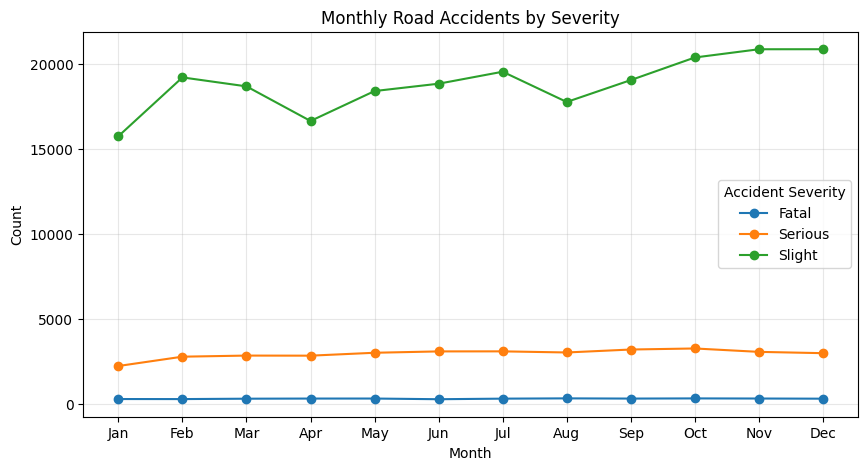

In [105]:
acc_severity = df['Accident_Severity']
month_severity = pd.crosstab(df['Month'], df['Accident_Severity'])

month_severity.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents by Severity'
)

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Accident Severity")
plt.show()


INSIGHTS 27 : Jan has the least slight accidents happen with 15,761 cases, making up to 0.27% of all slight accidents. This indicates that fewer accidents during that month.

INSIGHTS 28 : However since august the numbers of slight accident greatly increases/

<h1> <i>A Data Analysis Journey: From National Trends to Local Insights </i></h1>

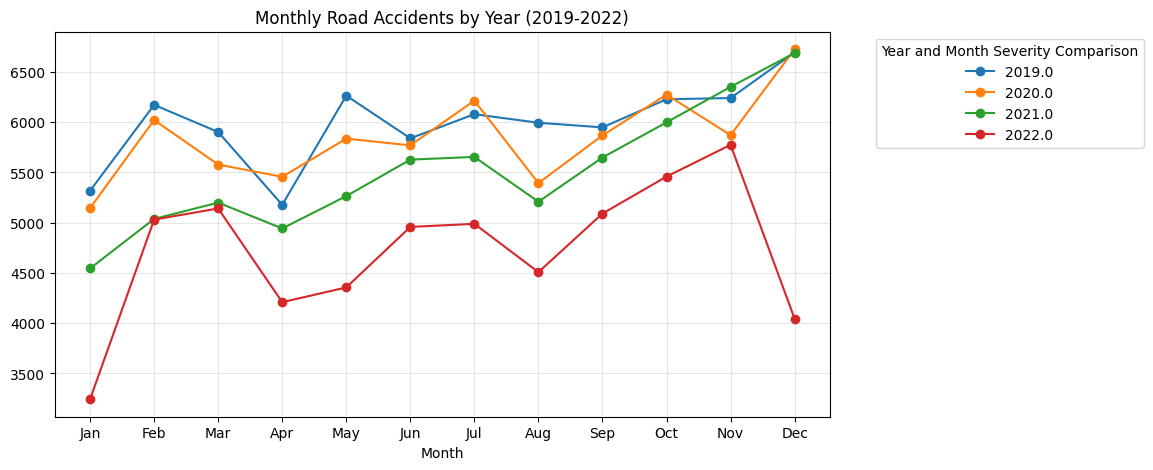

In [106]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = df.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

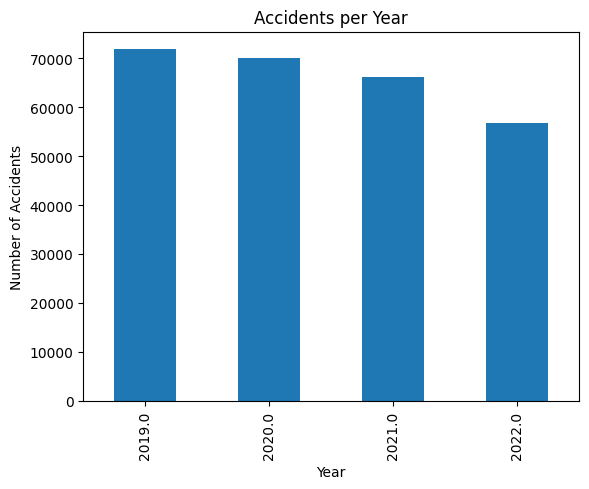

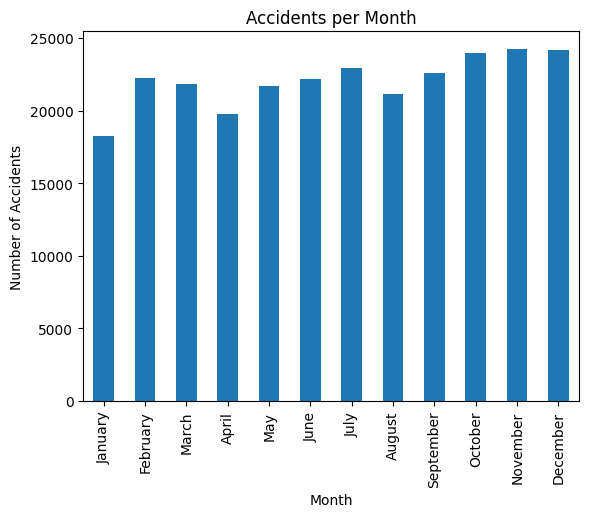

DayOfWeek
Monday       28564
Tuesday      38714
Wednesday    40037
Thursday     39641
Friday       39822
Saturday     43164
Sunday       35065
Name: count, dtype: int64


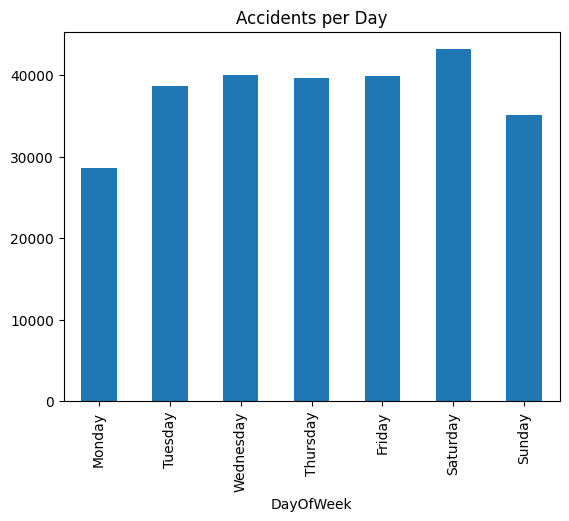

In [107]:
# Accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_day = df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
print(accidents_per_day)

In [108]:
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_month

Month
1.0     18252
2.0     22264
3.0     21824
4.0     19787
5.0     21723
6.0     22196
7.0     22939
8.0     21106
9.0     22558
10.0    23962
11.0    24240
12.0    24156
Name: count, dtype: int64

<h3>Accident Severity </h3>

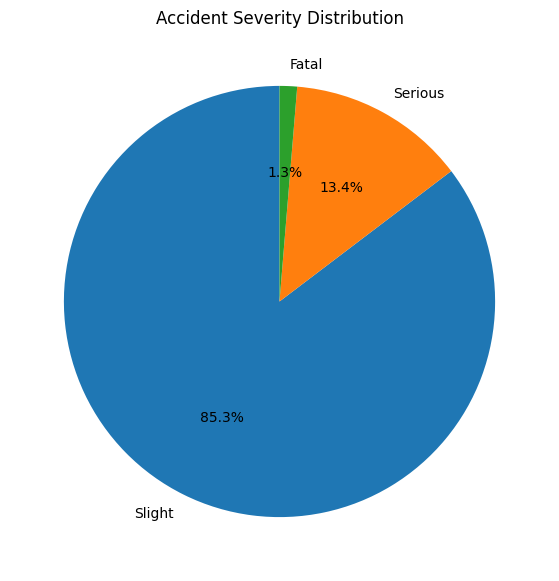

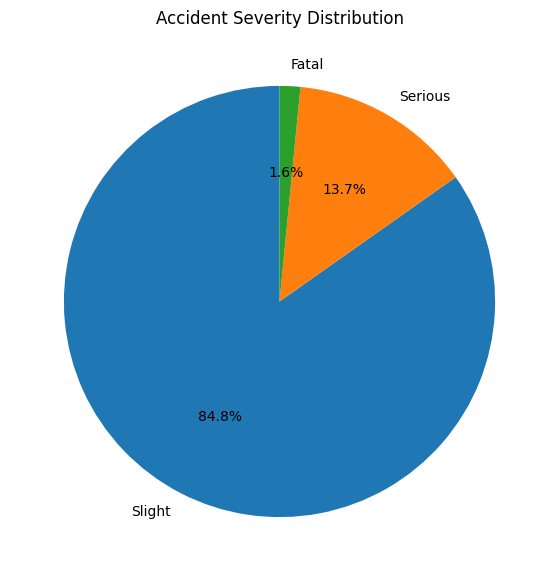

In [109]:
severity_counts = df['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019 = df[df['Year'] == 2019]
# severity_2019
sc_2019 = severity_2019['Accident_Severity'].value_counts()

plt.pie(sc_2019,
        labels = sc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h1 style="color: red;">Using District Area to make a comparison to a general result </h1>

<h1>Darlington Analysis</h1>
<img style="height: 500px; weight: 100%;" src='assets//darlington.jpg'/>

In [110]:
for i in df['District Area'].unique()[:20]: # I just make it show 20 districts so that the data is not too crowded.
    print(i)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)


In [111]:
# df.dtypes
darlington_df = df[df['District Area'] == 'Darlington']

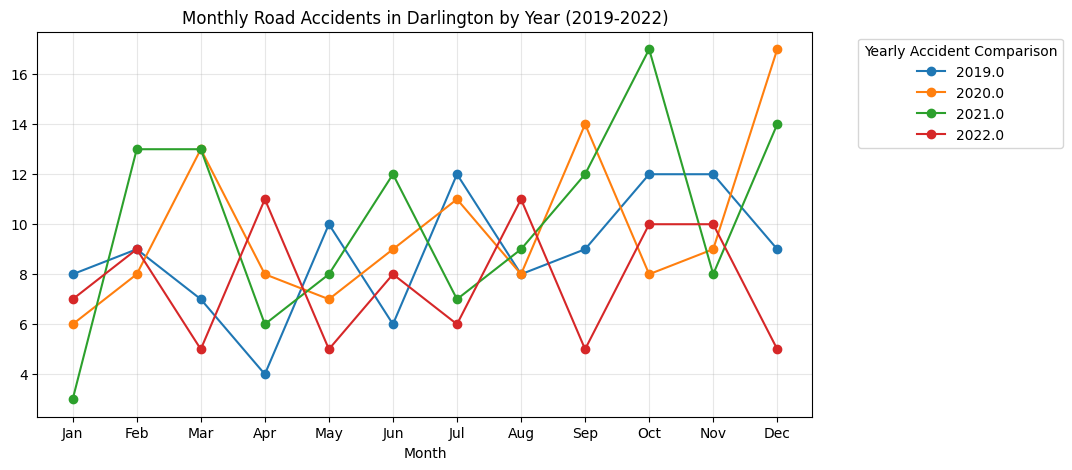

In [112]:
monthly_darlingtondata = darlington_df.groupby(['Year', 'Month']).size()

monthly_darlingtondata = monthly_darlingtondata.unstack(level=0)

monthly_darlingtondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Darlington by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

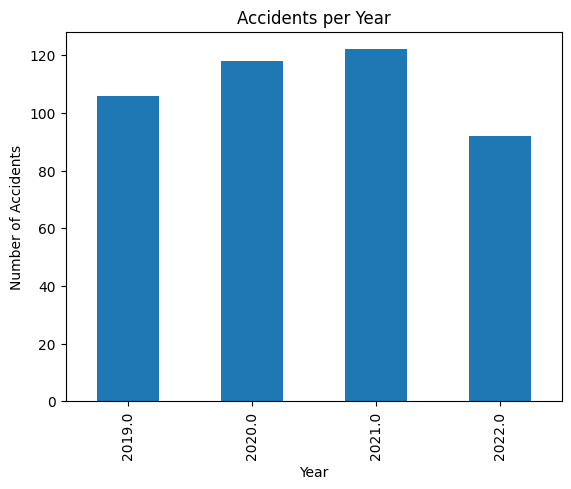

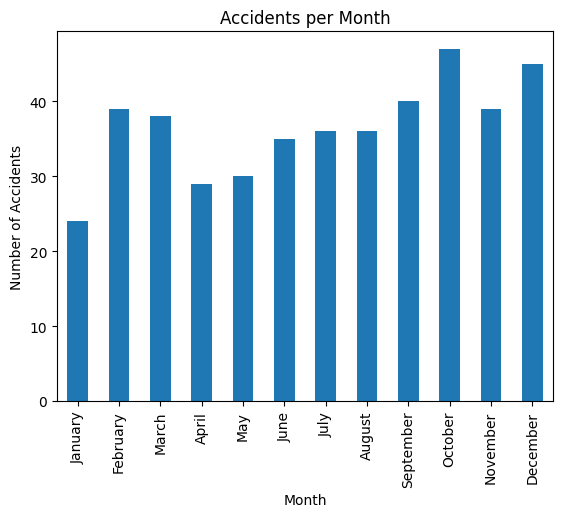

DayOfWeek
Monday       41
Tuesday      62
Wednesday    62
Thursday     68
Friday       70
Saturday     79
Sunday       56
Name: count, dtype: int64


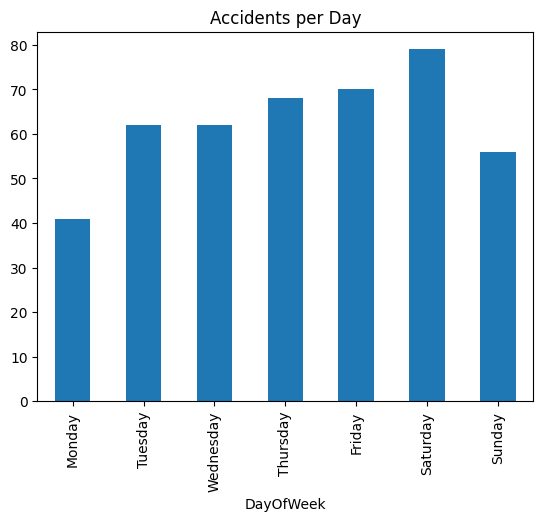

In [113]:
# Accidents per year
accidents_per_year = darlington_df['Year'].value_counts().sort_index()
accidents_per_month = darlington_df['Month'].value_counts().sort_index()
accidents_per_day = darlington_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
print(accidents_per_day)

<h4><i>Accident Severity in Darlington</i></h4>

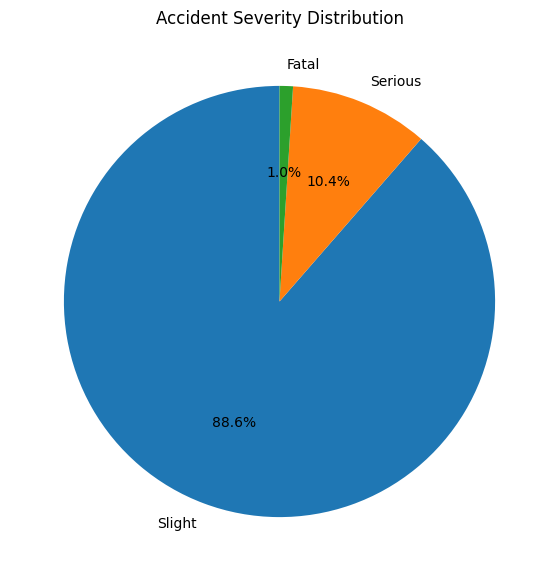

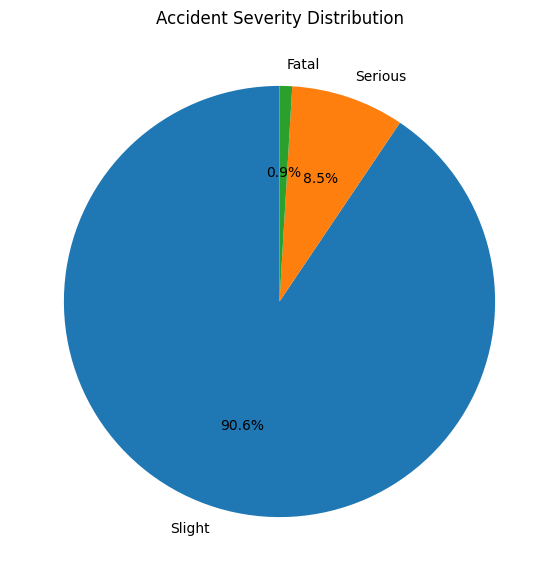

In [114]:
severity_darlington  = darlington_df['Accident_Severity'].value_counts()

plt.pie(severity_darlington,
        labels = severity_darlington.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_darlington = darlington_df[darlington_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_darlington['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


INSIGHT 29: The data shows that accidents in Darlington peaked in year 2021, then steadily declined in the following years. October recorded the highest number of accidents, while January had the least.

<h3>Using Heatmap to make visualizations</h3>

In [115]:
darlington_locations  = list(zip(darlington_df['Latitude'], darlington_df['Longitude']))
darlington_map = folium.Map(location=[darlington_df['Latitude'].mean(), darlington_df['Longitude'].mean()], zoom_start=12)
HeatMap(darlington_locations).add_to(darlington_map)
# darlington_map.save('darlington_heatmap.html')
darlington_map

<hr>

<h1>Wiltshire Analysis</h1>
<img style="height: 500px; weight: 100%;" src='assets//wiltshire.webp'/>

In [116]:
# df.dtypes
wiltshire_df = df[df['District Area'] == 'Wiltshire']

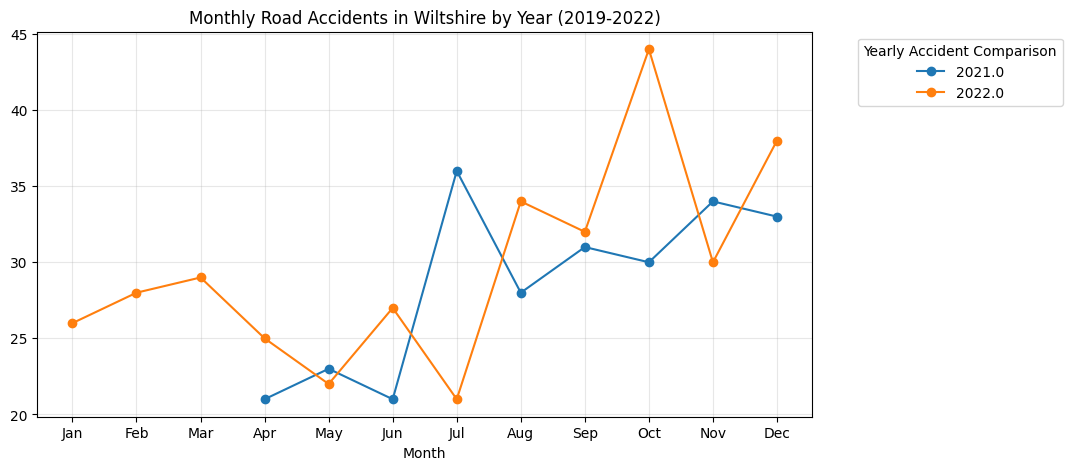

In [117]:
monthly_wiltshiredata = wiltshire_df.groupby(['Year', 'Month']).size()

monthly_wiltshiredata = monthly_wiltshiredata.unstack(level=0)

monthly_wiltshiredata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Wiltshire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

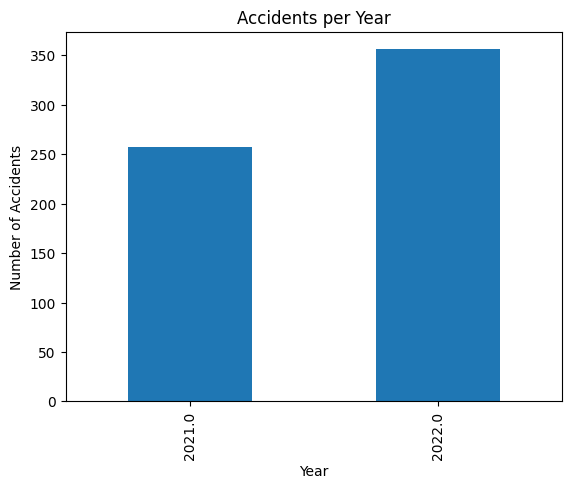

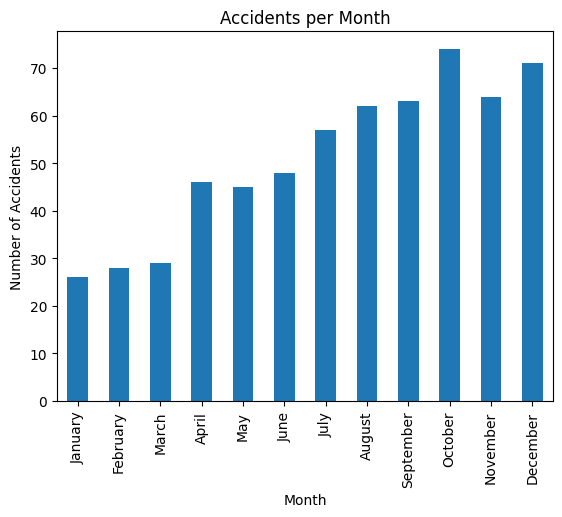

DayOfWeek
Monday        72
Tuesday       89
Wednesday     88
Thursday      91
Friday        82
Saturday     107
Sunday        84
Name: count, dtype: int64


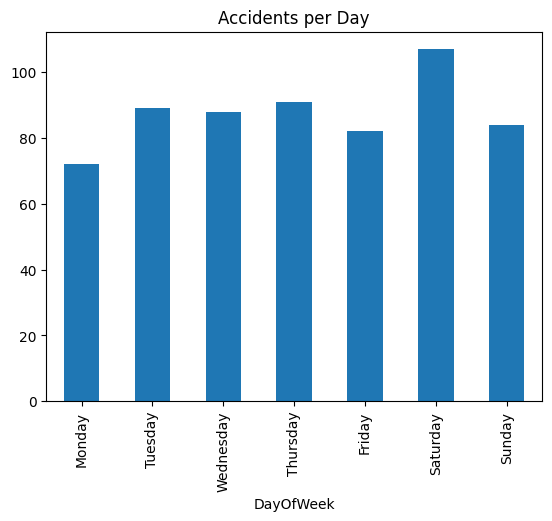

In [118]:
# Accidents per year
accidents_per_year = wiltshire_df['Year'].value_counts().sort_index()
accidents_per_month = wiltshire_df['Month'].value_counts().sort_index()
accidents_per_day = wiltshire_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
print(accidents_per_day)

<h4><i>Accident Severity in Wiltshire</i></h4>

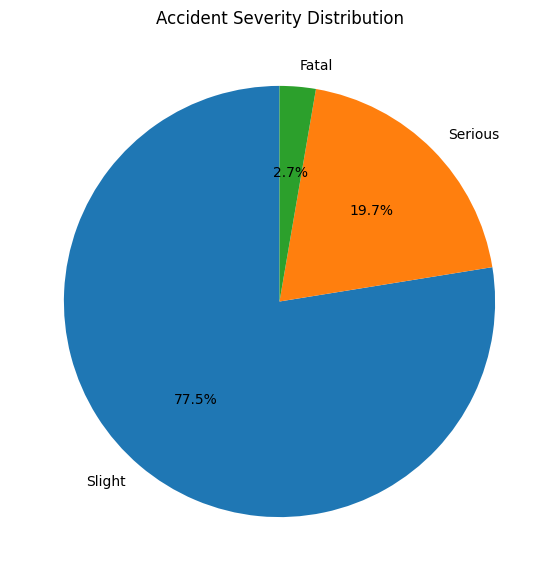

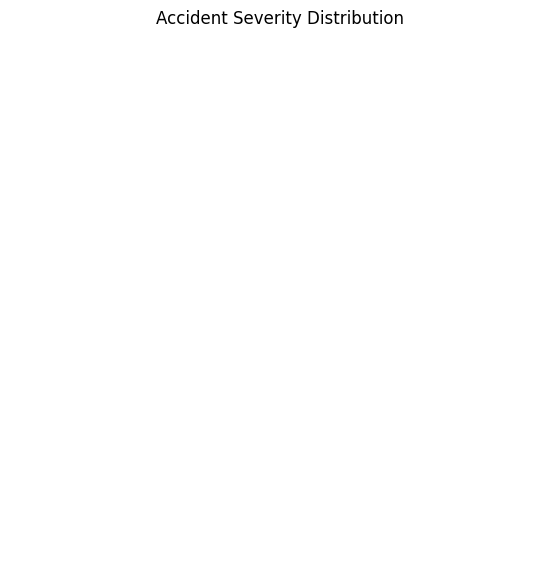

In [119]:
severity_wiltshire  = wiltshire_df['Accident_Severity'].value_counts()

plt.pie(severity_wiltshire,
        labels = severity_wiltshire.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_wiltshire = wiltshire_df[wiltshire_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_wiltshire['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


INSIGHT 30: There were no recorded accidents in Wiltshire during 2019 and 2020. However, in 2022, there was a sharp increase in accidents, especially between July and October. Fatal accidents in Wiltshire were also higher than in other districts.

<h3>Using Heatmap to make visualizations</h3>

In [120]:
wiltshire_locations  = list(zip(wiltshire_df['Latitude'], wiltshire_df['Longitude']))
wiltshire_map = folium.Map(location=[wiltshire_df['Latitude'].mean(), wiltshire_df['Longitude'].mean()], zoom_start=10)
HeatMap(wiltshire_locations).add_to(wiltshire_map)
# darlington_map.save('wiltshire_heatmap.html')
wiltshire_map

<hr>

<h1>South Lakeland Analysis</h1>
<img style="height: 500px; weight: 100%;" src='assets//southlakeland.webp'/>

In [121]:
# df.dtypes
south_lakeland_df = df[df['District Area'] == 'South Lakeland']

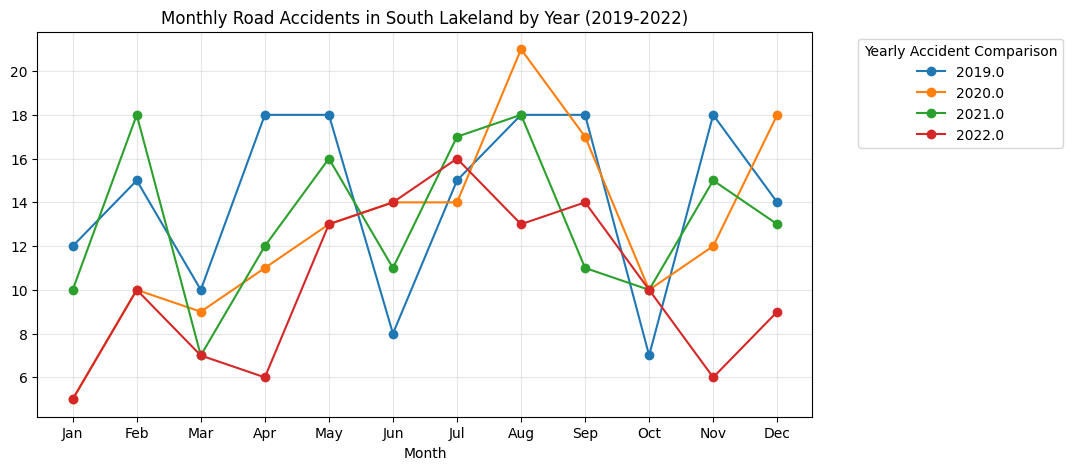

In [122]:
monthly_south_lakelanddata = south_lakeland_df.groupby(['Year', 'Month']).size()

monthly_south_lakelanddata = monthly_south_lakelanddata.unstack(level=0)

monthly_south_lakelanddata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in South Lakeland by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

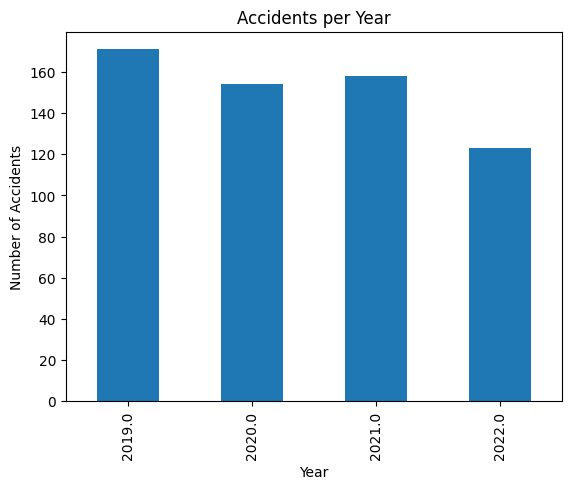

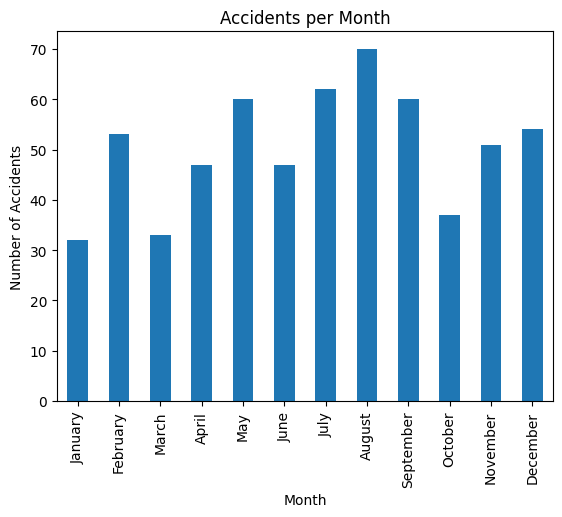

DayOfWeek
Monday       83
Tuesday      89
Wednesday    98
Thursday     79
Friday       89
Saturday     89
Sunday       79
Name: count, dtype: int64


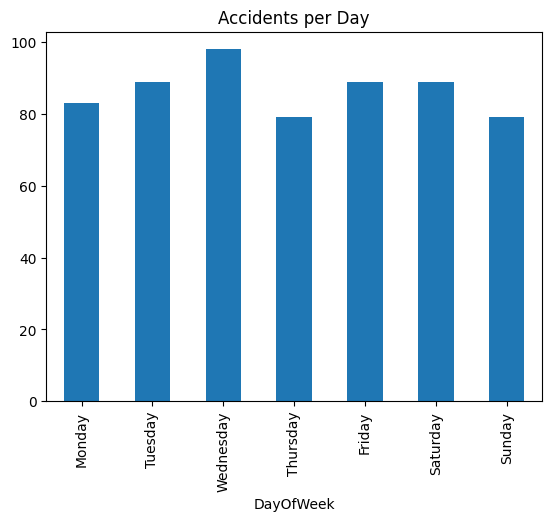

In [123]:
# Accidents per year
accidents_per_year = south_lakeland_df['Year'].value_counts().sort_index()
accidents_per_month = south_lakeland_df['Month'].value_counts().sort_index()
accidents_per_day = south_lakeland_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
print(accidents_per_day)

<h4><i>Accident Severity in South Lakeland</i></h4>

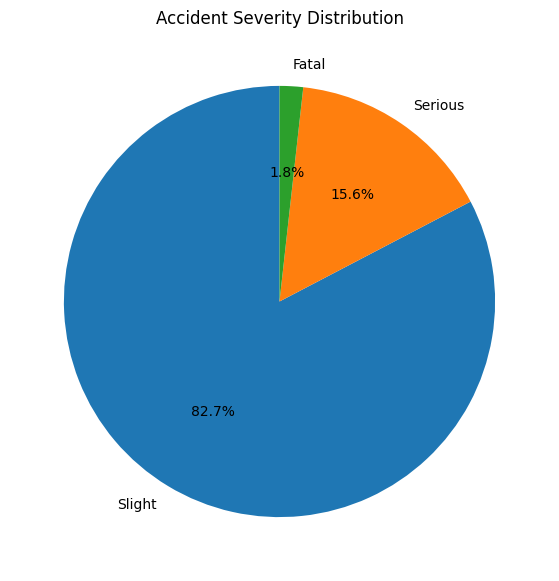

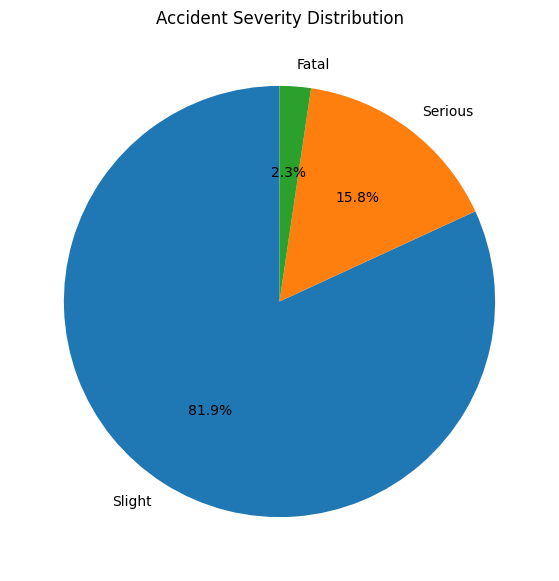

In [124]:
severity_south_lakeland  = south_lakeland_df['Accident_Severity'].value_counts()

plt.pie(severity_south_lakeland,
        labels = severity_south_lakeland.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_south_lakeland = south_lakeland_df[south_lakeland_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_south_lakeland['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

INSIGHT 31: In South Lakeland, accident numbers rose sharply in year 2020, but the highest overall accidents occurred in 2019. The month of August had the most accidents between year 2019–2022. The district also recorded more fatal accidents compared to others.

<h3>Using Heatmap to make visualizations</h3>

In [125]:
south_lakeland_locations  = list(zip(south_lakeland_df['Latitude'], south_lakeland_df['Longitude']))
south_lakeland_map = folium.Map(location=[south_lakeland_df['Latitude'].mean(), south_lakeland_df['Longitude'].mean()], zoom_start=10)
HeatMap(south_lakeland_locations).add_to(south_lakeland_map)
# darlington_map.save('south_lakeland_heatmap.html')
south_lakeland_map

<hr>

<h1>Blackpool Analysis</h1>
<img style="height: 500px; weight: 100%;" src='assets//blackpool.webp'/>

In [126]:
# df.dtypes
blackpool_df = df[df['District Area'] == 'Blackpool']

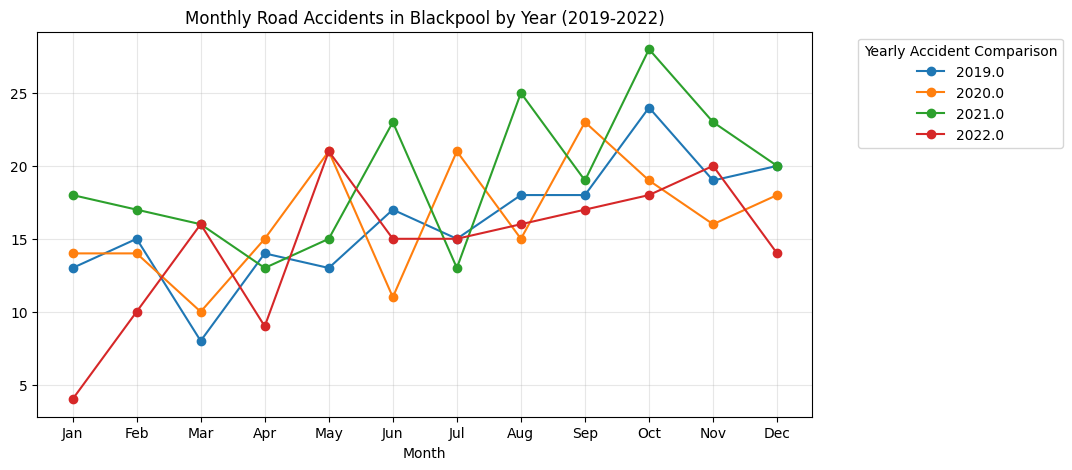

In [127]:
monthly_blackpooldata = blackpool_df.groupby(['Year', 'Month']).size()

monthly_blackpooldata = monthly_blackpooldata.unstack(level=0)

monthly_blackpooldata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Blackpool by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

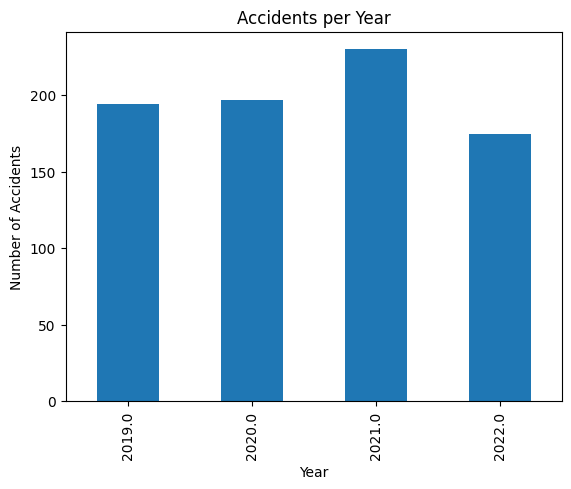

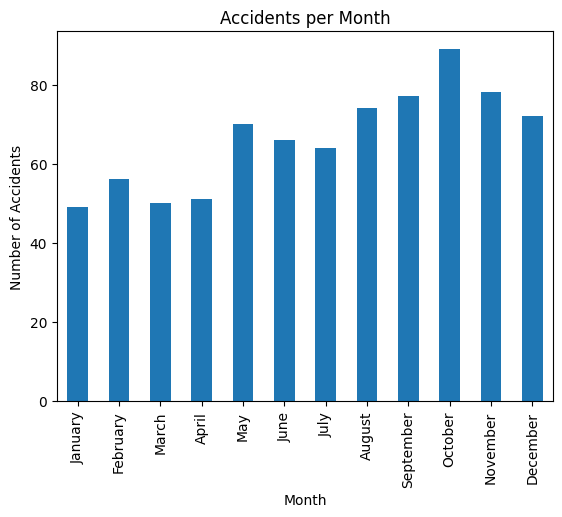

DayOfWeek
Monday        79
Tuesday      118
Wednesday    117
Thursday     115
Friday       110
Saturday     130
Sunday       127
Name: count, dtype: int64


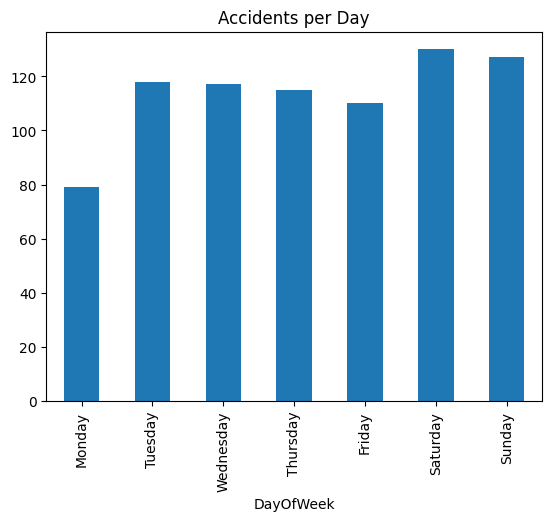

In [128]:
# Accidents per year
accidents_per_year = blackpool_df['Year'].value_counts().sort_index()
accidents_per_month = blackpool_df['Month'].value_counts().sort_index()
accidents_per_day = blackpool_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
print(accidents_per_day)

<h4><i>Accident Severity in Blackpool</i></h4>

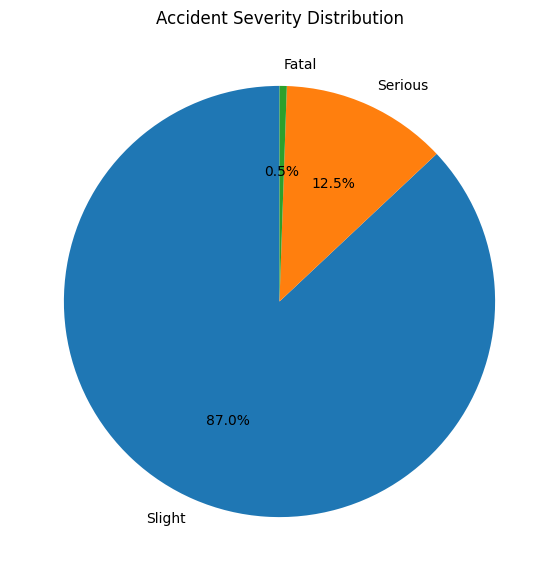

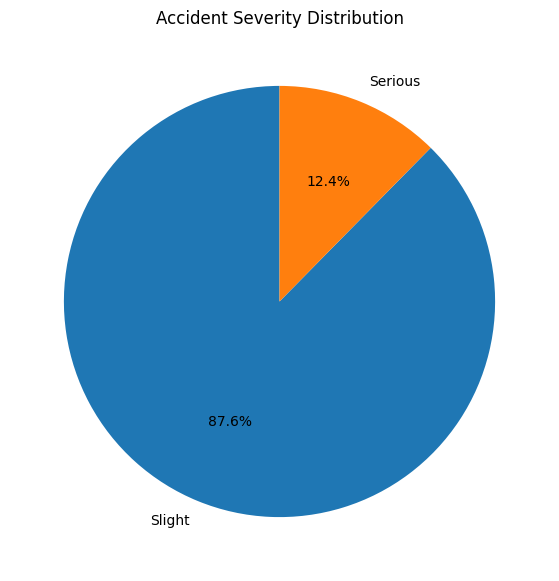

In [129]:
severity_blackpool  = blackpool_df['Accident_Severity'].value_counts()

plt.pie(severity_blackpool,
        labels = severity_blackpool.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_blackpool = blackpool_df[blackpool_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_blackpool['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

INSIGHT 32: Blackpool had the highest accident count in 2021, but accidents dropped in June of the following year before rising again in later months. October was the peak month for accidents. Fatal accidents were very low overall, and none were recorded in 2019.

<h3>Using Heatmap to make visualizations</h3>

In [130]:
blackpool_locations  = list(zip(blackpool_df['Latitude'], blackpool_df['Longitude']))
blackpool_map = folium.Map(location=[blackpool_df['Latitude'].mean(), blackpool_df['Longitude'].mean()], zoom_start=12)
HeatMap(blackpool_locations).add_to(blackpool_map)
# darlington_map.save('blackpool_heatmap.html')
blackpool_map

<hr>

<h1>West Lancashire Analysis</h1>
<img style="height: 500px; weight: 100%;" src='assets//westlancashire.webp'/>

In [131]:
# df.dtypes
west_lancashire_df = df[df['District Area'] == 'West Lancashire']

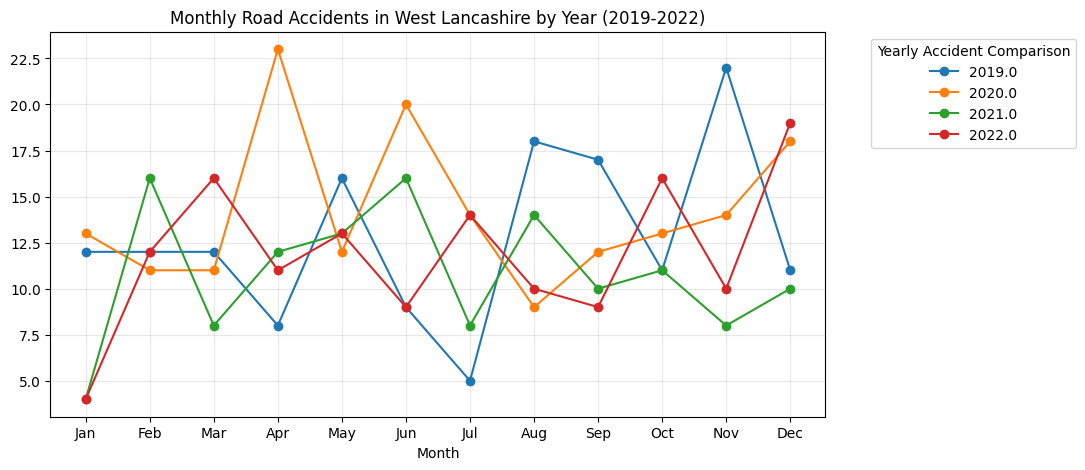

In [132]:
monthly_west_lancashiredata = west_lancashire_df.groupby(['Year', 'Month']).size()

monthly_west_lancashiredata = monthly_west_lancashiredata.unstack(level=0)

monthly_west_lancashiredata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in West Lancashire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

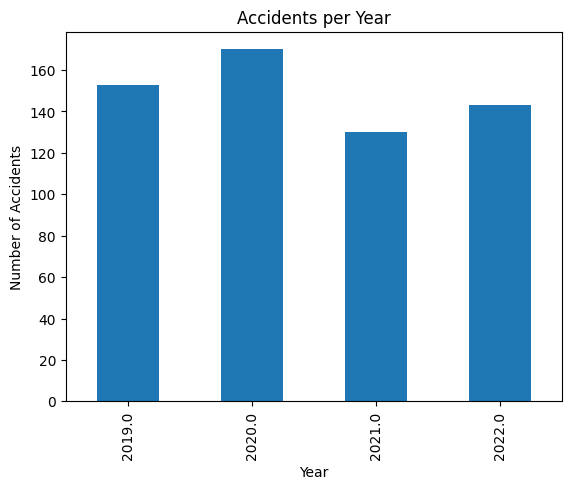

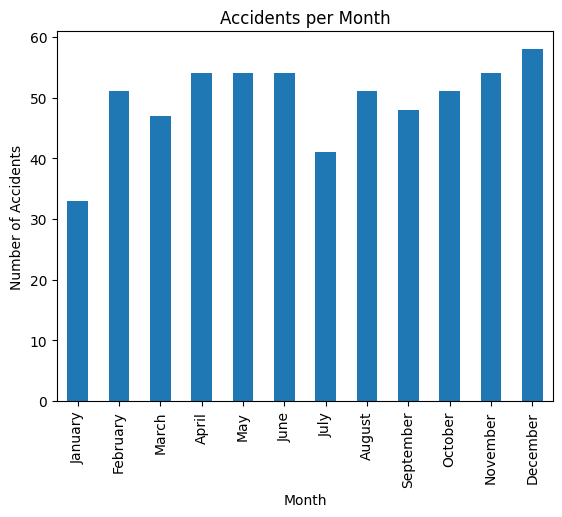

DayOfWeek
Monday       73
Tuesday      84
Wednesday    89
Thursday     84
Friday       93
Saturday     76
Sunday       97
Name: count, dtype: int64


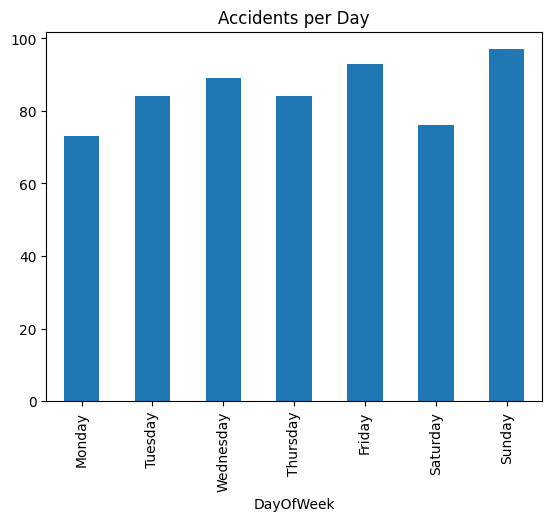

In [133]:
# Accidents per year
accidents_per_year = west_lancashire_df['Year'].value_counts().sort_index()
accidents_per_month = west_lancashire_df['Month'].value_counts().sort_index()
accidents_per_day = west_lancashire_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
print(accidents_per_day)

west_lancashire_df

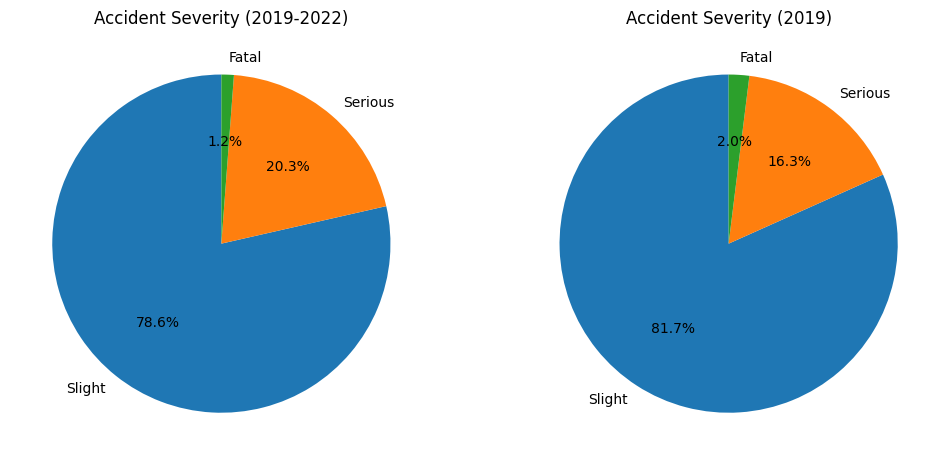

In [134]:
# Pie chart for all years
plt.subplot(1, 2, 1) # this just makes the pie plot next to each others by specifying which rows and columns to put it in and in what order (rows, cols, position(order)).
severity_west_lancashire = west_lancashire_df['Accident_Severity'].value_counts()
plt.pie(severity_west_lancashire,
        labels=severity_west_lancashire.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Accident Severity (2019-2022)')

# Pie chart for 2019
plt.subplot(1, 2, 2)
severity_2019_west_lancashire = west_lancashire_df[west_lancashire_df['Year'] == 2019]
lsc_2019 = severity_2019_west_lancashire['Accident_Severity'].value_counts()
plt.pie(lsc_2019,
        labels=lsc_2019.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Accident Severity (2019)')

plt.gcf().set_size_inches(12, 6)  # To make it wider
# plt.tight_layout() # this just adds enough padding to make everything fit cleanly
plt.show()

INSIGHT 33: Accidents in West Lancashire peaked in 2020, particularly in the month of April. December was the month with the most accidents happened. In 2019, accidents rose in October, and fatal accidents were also higher that year.

<h3>Using Heatmap to make visualizations</h3>

In [135]:
west_lancashire_locations  = list(zip(west_lancashire_df['Latitude'], west_lancashire_df['Longitude']))
west_lancashire_map = folium.Map(location=[west_lancashire_df['Latitude'].mean(), west_lancashire_df['Longitude'].mean()], zoom_start=12)
HeatMap(west_lancashire_locations).add_to(west_lancashire_map)
# darlington_map.save('west_lancashire_heatmap.html')
west_lancashire_map

<hr>

<h1>Burnley Analysis</h1>
<img style="height: 500px; weight: 100%;" src='assets//burnley.webp'/>

In [136]:
# df.dtypes
burnley_df = df[df['District Area'] == 'Burnley']

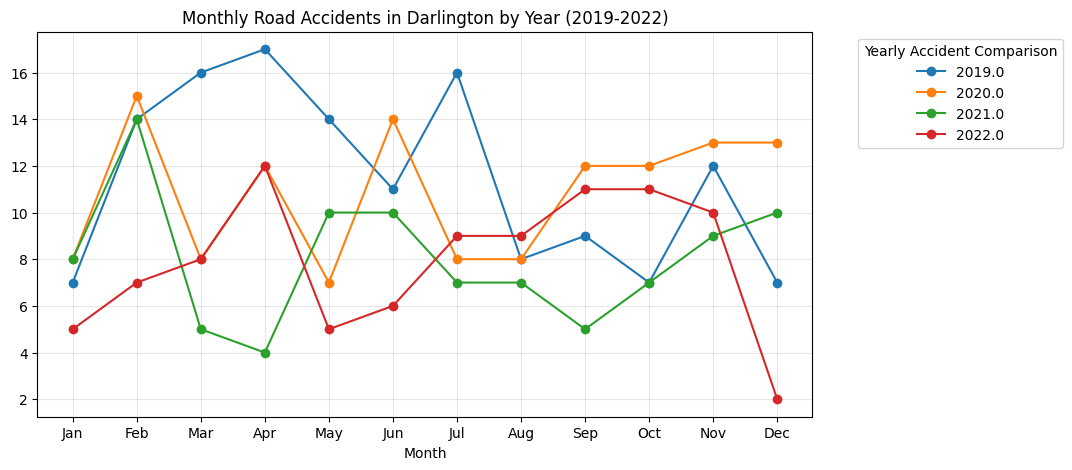

In [137]:
monthly_burnleydata = burnley_df.groupby(['Year', 'Month']).size()

monthly_burnleydata = monthly_burnleydata.unstack(level=0)

monthly_burnleydata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Darlington by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

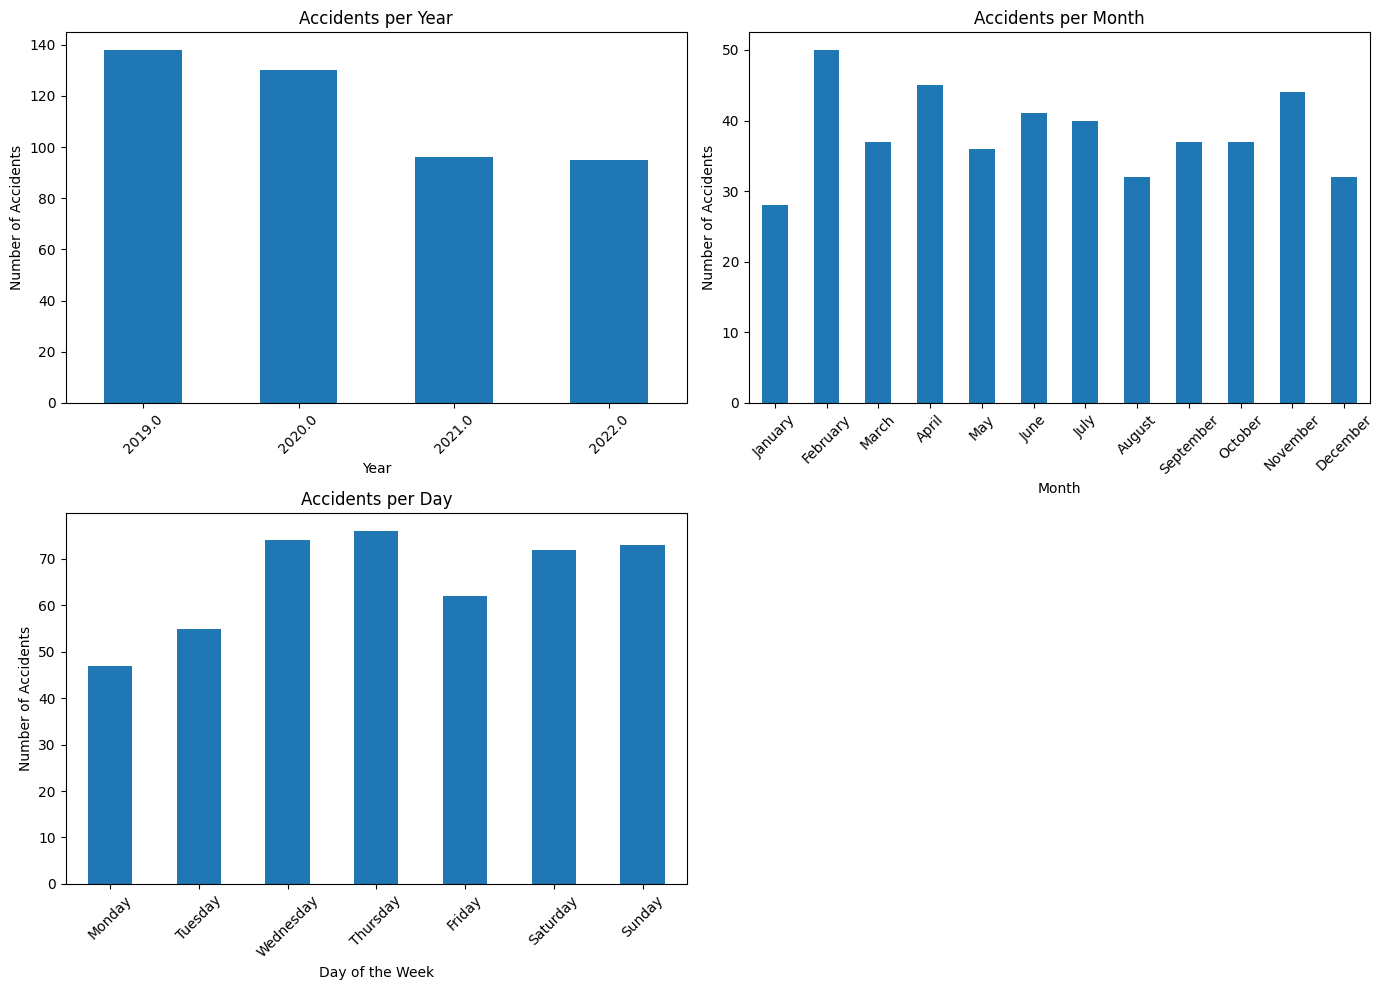

In [138]:
# Accidents per year
accidents_per_year = burnley_df['Year'].value_counts().sort_index()
accidents_per_month = burnley_df['Month'].value_counts().sort_index()
accidents_per_day = burnley_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
plt.subplot(2, 2, 1) # this just makes the pie plot next to each others by specifying which rows and columns to put it in and in what order (rows, cols, position(order)).
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45) # It just make the x-labels slightly bent so that it can be read more easily

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

#PER MONTH
# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

plt.subplot(2, 2, 2)
accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

#PER DAY
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

plt.subplot(2, 2, 3)
accidents_per_day.index = accidents_per_day.index.map(day_names) # To make the labels in the Accident Per Days be Monday-Sunday instead of numbers.
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.gcf().set_size_inches(14, 10)
plt.tight_layout()
plt.show()

<h4><i>Accident Severity in Burnley</i></h4>

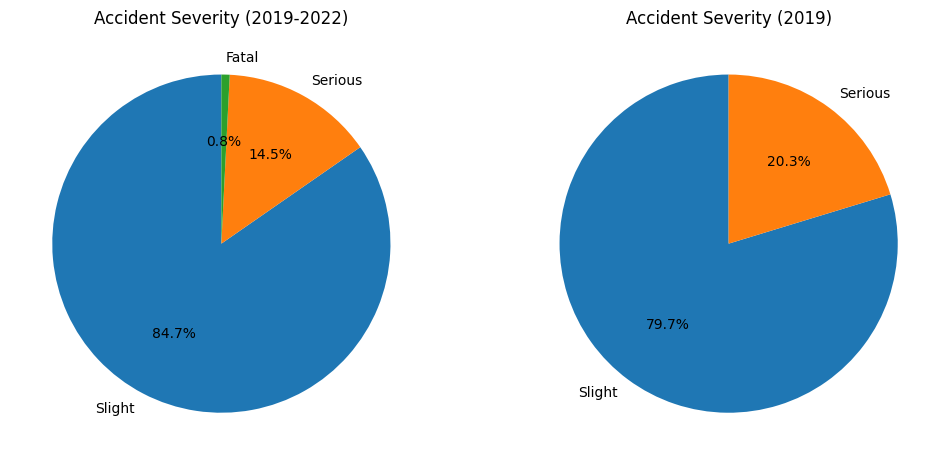

In [139]:
# Pie chart for all years
plt.subplot(1, 2, 1) # this just makes the pie plot next to each others by specifying which rows and columns to put it in and in what order (rows, cols, position(order)).

severity_burnley = burnley_df['Accident_Severity'].value_counts()

plt.pie(severity_burnley,
        labels=severity_burnley.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Accident Severity (2019-2022)')

# Pie chart for year 2019
plt.subplot(1, 2, 2)

severity_2019_burnley = burnley_df[burnley_df['Year'] == 2019]

lsc_2019 = severity_2019_burnley['Accident_Severity'].value_counts()
plt.pie(lsc_2019,
        labels=lsc_2019.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Accident Severity (2019)')

plt.gcf().set_size_inches(12, 6)  # To make it wider
# plt.tight_layout() # this just adds enough padding to make everything fit cleanly
plt.show()

INSIGHT 34: In Burnley, accidents steadily increased from January to April in 2019. By December 2022, accident numbers dropped sharply. Overall, accidents have decreased each year since 2019. January tends to have low accident counts, but they quickly rise in February. Fatal accidents were generally low, and none were recorded in 2019, similar to Blackpool.

<h3>Using Heatmap to make visualizations</h3>

In [140]:
burnley_locations  = list(zip(burnley_df['Latitude'], burnley_df['Longitude']))
burnley_map = folium.Map(location=[burnley_df['Latitude'].mean(), burnley_df['Longitude'].mean()], zoom_start=12)
HeatMap(burnley_locations).add_to(burnley_map)
# darlington_map.save('burnley_heatmap.html')
burnley_map